Primero se descarga el dataset usando la API de kaggle y se descomprime.

Luego se copia el cache de los tamannos de imagenes

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle
!kaggle competitions download -c dstl-satellite-imagery-feature-detection


100% 20.2G/20.2G [05:41<00:00, 53.2MB/s]
100% 20.2G/20.2G [05:42<00:00, 63.4MB/s]


In [ ]:
!unzip /content/dstl-satellite-imagery-feature-detection.zip
!unzip three_band.zip
!rm train_wkt_v4.csv.zip
!rm grid_sizes.csv.zip
!rm unet_trees.py


In [ ]:
!rm sample_submission.csv.zip
!rm train_geojson_v3.zip
!rm train_wkt_v4.csv.zip
!rm sixteen_band.zip


In [ ]:
!pip install rasterio
!pip install opencv-python

En esta celda está el análisis de si es una ciudad o no

In [59]:
import rasterio as rst
import matplotlib.pyplot as plt
import numpy as np
import cv2
from IPython.display import clear_output


Normalizacion del ruso

In [22]:
def stretch_n(bands, lower_percent=5, higher_percent=95):
    out = np.zeros_like(bands)
    n = bands.shape[2]
    for i in range(n):
        a = 0  # np.min(band)
        b = 1  # np.max(band)
        c = np.percentile(bands[:, :, i], lower_percent)
        d = np.percentile(bands[:, :, i], higher_percent)
        t = a + (bands[:, :, i] - c) * (b - a) / (d - c)
        t[t < a] = a
        t[t > b] = b
        out[:, :, i] = t

    return out.astype(np.float32)

/content/three_band/6180_4_4.tif


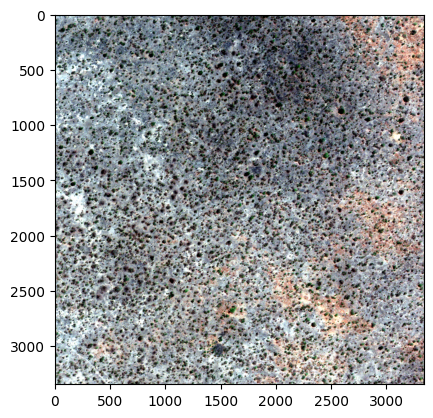

It is a city image (y or n) n


In [77]:
cities=[]
not_cities=[]

import time


def CCCscale(x):
  return (x - np.nanpercentile(x, 2)) / (np.nanpercentile(x, 98) - np.nanpercentile(x, 2))


def analysis_imagen(path):
  with rst.open(path) as src:
    r = src.read(1)[:3345,:3338]
    g = src.read(2)[:3345,:3338]
    b = src.read(3)[:3345,:3338]
    r_scl = CCCscale(r)
    g_scl = CCCscale(g)
    b_scl = CCCscale(b)
    img = cv2.merge((r_scl,g_scl,b_scl))

###Ruso
    # img = stretch_n((3345,3338,np.array([r,g,b])))
    # img = stretch_n(np.array([r,g,b]))
    # img = img[1]
    # img = cv2.merge((img[0],img[1],img[2]))

###
    time_s=time.time()
    plt.figure()
    plt.imshow(img)
    plt.show()

    time.sleep(1)
    decision = input("It is a city image (y or n) ")
    if decision == "" or decision == "n":
      not_cities.append(path)
    elif decision == "y":
      cities.append(path)
    else:
      analysis_imagen(path)
    clear_output(wait=True)



def browse_all_images(path):
  for a in range(10,190,10):
    for b in range(5):
      for c in range(5):
        if a < 100:
          img_path = f'{path}60{a}_{b}_{c}.tif'
          print(img_path)
          analysis_imagen(img_path)
        else:
          img_path = f'{path}6{a}_{b}_{c}.tif'
          print(img_path)
          analysis_imagen(img_path)





browse_all_images('/content/three_band/')
# analysis_imagen('/content/three_band/6100_2_2.tif')

In [84]:
print(cities)

['/content/three_band/6010_1_0.tif', '/content/three_band/6010_1_2.tif', '/content/three_band/6010_1_3.tif', '/content/three_band/6010_1_4.tif', '/content/three_band/6010_2_0.tif', '/content/three_band/6010_2_2.tif', '/content/three_band/6010_3_0.tif', '/content/three_band/6010_3_2.tif', '/content/three_band/6020_0_0.tif', '/content/three_band/6020_0_1.tif', '/content/three_band/6020_0_2.tif', '/content/three_band/6020_0_3.tif', '/content/three_band/6020_0_4.tif', '/content/three_band/6020_1_0.tif', '/content/three_band/6020_1_1.tif', '/content/three_band/6020_1_2.tif', '/content/three_band/6020_1_3.tif', '/content/three_band/6020_1_4.tif', '/content/three_band/6020_2_0.tif', '/content/three_band/6020_2_1.tif', '/content/three_band/6020_2_2.tif', '/content/three_band/6020_2_3.tif', '/content/three_band/6020_2_4.tif', '/content/three_band/6020_3_0.tif', '/content/three_band/6020_3_1.tif', '/content/three_band/6020_3_2.tif', '/content/three_band/6020_3_3.tif', '/content/three_band/6020_4

In [79]:
print(not_cities)

['/content/three_band/6010_0_0.tif', '/content/three_band/6010_0_1.tif', '/content/three_band/6010_0_2.tif', '/content/three_band/6010_0_3.tif', '/content/three_band/6010_0_4.tif', '/content/three_band/6010_1_1.tif', '/content/three_band/6010_2_1.tif', '/content/three_band/6010_2_3.tif', '/content/three_band/6010_2_4.tif', '/content/three_band/6010_3_1.tif', '/content/three_band/6010_3_3.tif', '/content/three_band/6010_3_4.tif', '/content/three_band/6010_4_0.tif', '/content/three_band/6010_4_1.tif', '/content/three_band/6010_4_2.tif', '/content/three_band/6010_4_3.tif', '/content/three_band/6010_4_4.tif', '/content/three_band/6020_3_4.tif', '/content/three_band/6040_0_0.tif', '/content/three_band/6040_0_1.tif', '/content/three_band/6040_0_2.tif', '/content/three_band/6040_0_3.tif', '/content/three_band/6040_0_4.tif', '/content/three_band/6040_1_0.tif', '/content/three_band/6040_1_1.tif', '/content/three_band/6040_1_2.tif', '/content/three_band/6040_1_3.tif', '/content/three_band/6040_1

In [80]:
with open("cities.txt", "w") as f:
    for elemento in cities:
        f.write(str(elemento) + "\n")

In [81]:
with open("not_cities.txt", "w") as f:
    for elemento in not_cities:
        f.write(str(elemento) + "\n")

In [82]:
import json

In [83]:
images = {}
images["cities"] = cities
images["not_cities"] = not_cities

with open("images.json", "w") as archivo:
    json.dump(images, archivo)

In [85]:
!zip analysis.zip not_cities.txt cities.txt images.json

  adding: not_cities.txt (deflated 92%)
  adding: cities.txt (deflated 91%)
  adding: images.json (deflated 92%)
